In [318]:
import pickle
import datetime
from dateutil.parser import parse

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np


import nltk
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#nltk.download()

In [401]:
# read data from pickle file
with open ('all_data_desk.pkl', 'rb') as fp:
    df = pickle.load(fp)
    
df.shape

(281288, 4)

In [403]:
# check to see that all months in 2018 are represented
df['date'][df['date'].apply(lambda x: x.year) == 2018].apply(lambda x: x.month).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [360]:
df.dropna(subset=['news_desk'],inplace=True)

#df.dropna(inplace=True)

In [256]:
'''
# there's some bad data in the snippets.  Drop the rows that have NaN to clean this up
df.dropna(inplace=True)

# take a subset of dataset to try things out
from sklearn.utils import shuffle
#df2 = df.sample(n=150000)
#df2 = shuffle(df2)

df2 = df.copy()

# remove some news_desks
#df2 = df2.drop(df2[df2['news_desk'] == 'Classified'].index)
#df2 = df2.drop(df2[df2['news_desk'] == 'Weekend'].index)

# create an new dataframe that combines the headline and snippet (more words in document)
df2['head_snip'] = df['headline'] + ' '+ df['snippet']

dates = list(df2['date'])

documents = list(df2['headline'])

df2.columns
'''

Index(['date', 'headline', 'news_desk', 'snippet', 'head_snip'], dtype='object')

In [268]:
# look at how many articles come from each news desk to choose which to include
foo = df.groupby('news_desk').count()
foo = foo.sort_values(by=['date'],ascending=False)
foo.head(65)

,date,headline,snippet
news_desk,,,
Business,22091,22091,22091
Foreign,21406,21406,21406
Sports,20044,20044,20044
Culture,17318,17318,17318
National,16247,16247,16247
Classified,13986,13986,13986
OpEd,12227,12227,12227
Metro,10881,10881,10881
Weekend,6178,6178,6178


In [402]:
# there's some bad data in the snippets.  Drop the rows that have NaN to clean this up
#df.dropna(inplace=True)
df.dropna(subset=['headline'],inplace=True)
df.dropna(subset=['snippet'],inplace=True)

# choose which news desks to include
#news_desk_use = ['National','Foreign','Politics','U.S.','Washington','U.S. / Politics','World / Europe',
#                 'World / Middle East','World / Asia Pacific','U.S. / Election 2016','World Americas','NewsDesk']
#df2 = pd.DataFrame()
#for desk in news_desk_use:
#    topic = df['news_desk'] == desk
#    df2 = pd.concat([df2,df[topic]])
    
#df2 = df2.sample(200)
# create an new dataframe that combines the headline and snippet (more words in document)

df2 = df.copy()

df2['head_snip'] = df2['headline'] + ' '+ df2['snippet']

dates = list(df2['date'].copy())

documents = list(df2['head_snip'].copy())

df2.shape

# write data to pickle file
with open('df2.pkl', 'wb') as fp:
    pickle.dump(df2, fp)
    

In [ ]:
with open ('dates.pkl', 'rb') as fp:
    df2 = pickle.load(fp)
with open ('documents.pkl', 'rb') as fp:
    df2 = pickle.load(fp)

In [317]:
df2['date'].to_csv('date.csv')
df2['head_snip'].to_csv('documents.csv')


In [272]:
df2.groupby('news_desk').count()

,date,headline,snippet,head_snip
news_desk,,,,
Foreign,21406,21406,21406,21406
National,16247,16247,16247,16247
NewsDesk,191,191,191,191
Politics,3318,3318,3318,3318
U.S.,1965,1965,1965,1965
U.S. / Election 2016,269,269,269,269
U.S. / Politics,1078,1078,1078,1078
Washington,1277,1277,1277,1277
World / Asia Pacific,423,423,423,423


In [5]:
df2['head_snip'].to_csv('documents.csv')

## functions

In [6]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print(f"Topic {topic_idx}")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        #print(top_doc_indices, np.argsort(W[:,topic_idx]))
        for doc_index in top_doc_indices:
            print('document with index',doc_index)
            print(documents[doc_index])
        print(' ')

In [368]:
print(len(documents))

1000


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
topic       0 non-null object
date        0 non-null object
num_docs    0 non-null object
dtypes: object(3)
memory usage: 0.0+ bytes
set up dataframe for data None
months in dataframe 1 48 47


<Figure size 1224x576 with 0 Axes>

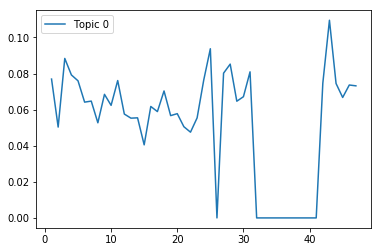

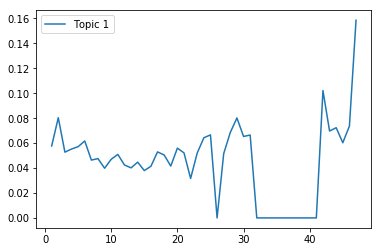

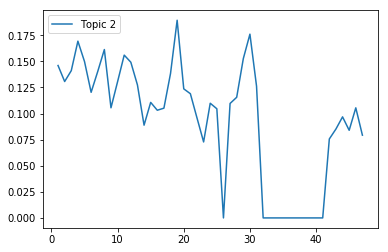

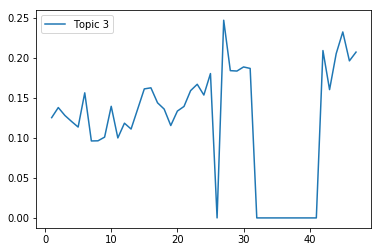

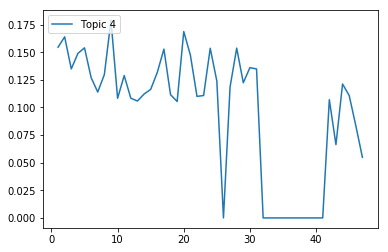

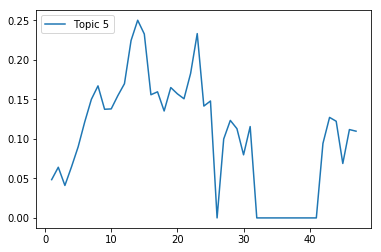

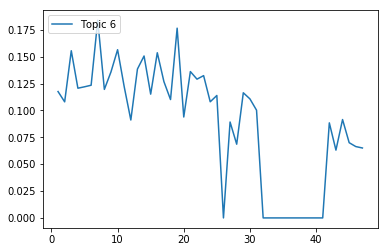

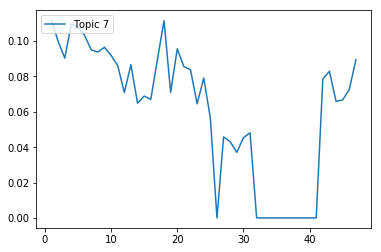

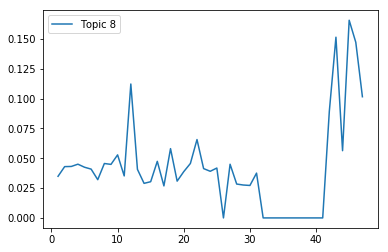

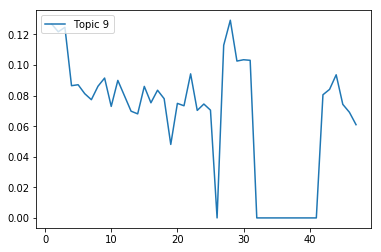

In [399]:
plot_data_all = plot_topic_trend_lda(lda_H, lda_W, documents, dates)

In [398]:
import matplotlib.pyplot as plt

def plot_topic_trend_lda(H, W, documents, dates):
    plt.figure(figsize=(17,8))
    min_date = min(dates)
    max_date = max(dates)
    min_year, min_week, weekday = min_date.isocalendar()
    max_year, max_week, weekday = max_date.isocalendar()

    plot_data_all = pd.DataFrame(columns=['topic','date','num_docs'])
    
    print('set up dataframe for data', plot_data_all.info())

    #timeframe = 'week'
    timeframe = 'month'
    if timeframe == 'week':
        week_start = min_week
        week_end = (max_year-min_year)*52+max_week + 1

        w = week_end - week_start
        
        for topic in range(len(H)):
            for week in range(week_start,week_end): 
                plot_data_all.at[w*topic+week,'topic'] = topic
                plot_data_all.at[w*topic+week,'date'] = week
        print('weeks in dataframe', week_start, week_end, w)

    elif timeframe == 'month':
        month_start = min_date.month
        max_month = max_date.month
        month_end = (max_year-min_year)*12+max_month + 1
        
        m = month_end - month_start
        
        for topic in range(len(H)):
            for month in range(month_start,month_end): 
                plot_data_all.at[m*topic+month,'topic'] = topic
                plot_data_all.at[m*topic+month,'date'] = month
        print('months in dataframe', month_start, month_end, m)
    
    plot_data_all['num_docs'] = 0
    plot_data_all = plot_data_all.astype('int')    
    
    #print(plot_data_all)
    
    for doc_idx in range(W.shape[0]):
        try:
            topic_idx = W[doc_idx].argmax()

            date_key = dates[doc_idx]
            #print('date_key',doc_idx,date_key)
            if timeframe == 'week':
                year, week, weekday = date_key.isocalendar()

                if year == 2016:   # 2015 gets weeks 1-52, subsequent years have to add multiples of 52 to week number
                    week += 52
                elif year == 2017:
                    week += 104
                elif year == 2018:
                    week += 156
                #print(w*topic_idx+week)
                plot_data_all.loc[w*topic_idx + week,'num_docs'] +=  1
                
            elif timeframe == 'month':
                year = date_key.year
                month = date_key.month
                if year == 2016:   # 2015 gets weeks 1-52, subsequent years have to add multiples of 52 to week number
                    month += 12
                elif year == 2017:
                    month += 24
                elif year == 2018:
                    month += 36
                #print(w*topic_idx+week)
                #print(month, year, topic_idx, m, m*topic_idx + month)

                plot_data_all.loc[m*topic_idx + month,'num_docs'] +=  1
                 
        except:
            topic_idx = W[doc_idx].argmax()
            date_key = dates[doc_idx]
            year, week, weekday = date_key.isocalendar()

            print(year, week,'did not work')
            
    # Normalize the values (percent per time period)
    month_doc_totals = plot_data_all.groupby('date').sum()['num_docs']
    
    for i in range(len(plot_data_all)):
        d = plot_data_all.iloc[i,1]
        if month_doc_totals[d] != 0:
            plot_data_all.iloc[i,2] /= month_doc_totals[d]
    
    for topic in range(len(H)):
        foo = plot_data_all[plot_data_all['topic'] == topic]
        plt.figure()
        plt.plot(foo['date'],foo['num_docs'],label=f'Topic {topic}')
        plt.legend(loc='upper left');
    #return
    return plot_data_all

In [33]:
'''
def docdate_to_week(dates):
    min_date = min(dates)
    max_date = max(dates)
    min_year, min_week, weekday = min_date.isocalendar()
    max_year, max_week, weekday = max_date.isocalendar()

    week_start = min_week
    week_end = (max_year-min_year)*52+max_week + 1

    w = week_end - week_start
    
    doc_week = []
    for doc_idx in range(len(dates)):

        date_key = dates[doc_idx]
        year, week, weekday = date_key.isocalendar()
        if year == 2016:   # 2015 gets weeks 1-52, subsequent years have to add multiples of 52 to week number
            week += 52
        elif year == 2017:
            week += 104
        elif year == 2018:
            week += 156
        doc_week.append(week)  
    
    return doc_week
'''

months in dataframe 1 48 47
<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 1 to 705
Data columns (total 3 columns):
topic       705 non-null int64
date        705 non-null int64
num_docs    705 non-null int64
dtypes: int64(3)
memory usage: 42.0 KB
set up dataframe for data None


<Figure size 1224x576 with 0 Axes>

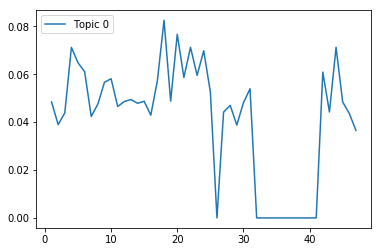

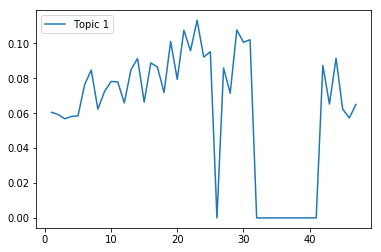

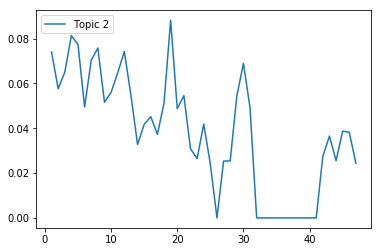

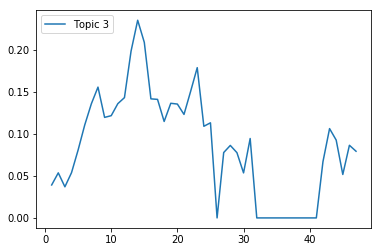

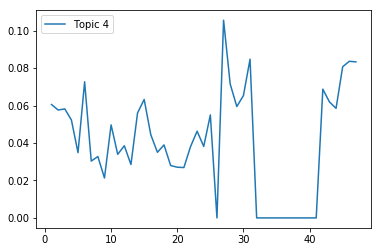

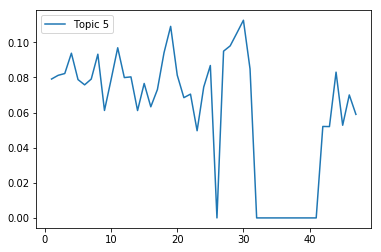

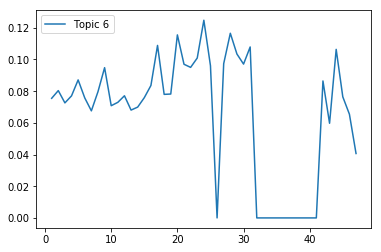

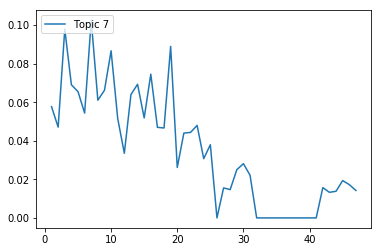

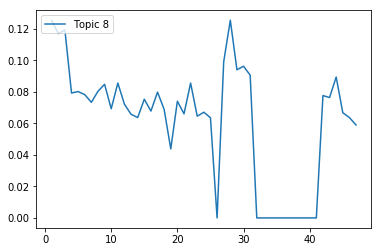

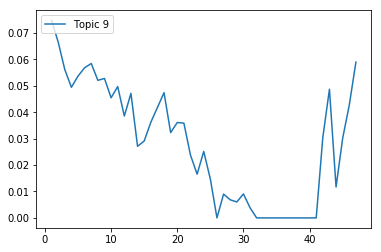

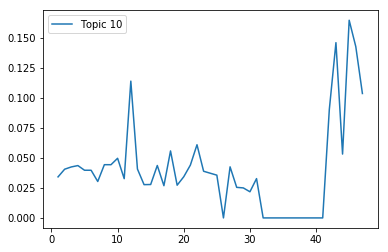

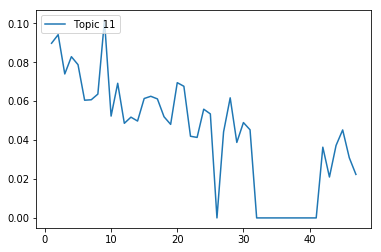

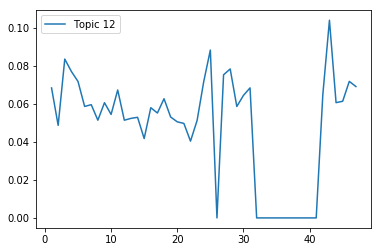

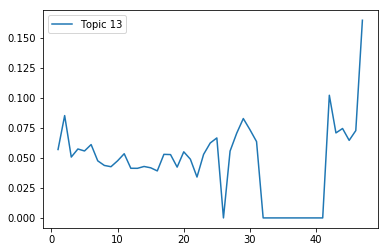

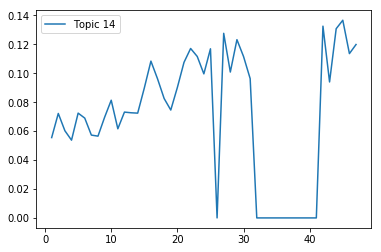

In [391]:
plot_data_all = plot_topic_trend_ldaKM(c, predict, dates)

In [400]:
plot_data_all.to_csv('plot_data_all_month.csv')

In [390]:
def plot_topic_trend_ldaKM(groups, predict, dates):
    # groups = number of groups (int)
    # predict = array of group number
    # dates = array of dates that matches predict
    plt.figure(figsize=(17,8))
    min_date = min(dates)
    max_date = max(dates)
    min_year, min_week, weekday = min_date.isocalendar()
    max_year, max_week, weekday = max_date.isocalendar()

    plot_data_all = pd.DataFrame(columns=['topic','date','num_docs'])
    
    #timeframe = 'week'
    timeframe = 'month'
    if timeframe == 'week':
        week_start = min_week
        week_end = (max_year-min_year)*52+max_week + 1

        w = week_end - week_start
        
        for topic in range(groups):
            for week in range(week_start,week_end): 
                plot_data_all.at[w*topic+week,'topic'] = topic
                plot_data_all.at[w*topic+week,'date'] = week
        print('weeks in dataframe', week_start, week_end, w)

    
    elif timeframe == 'month':
        month_start = min_date.month
        max_month = max_date.month
        month_end = (max_year-min_year)*12+max_month + 1
        
        m = month_end - month_start
        
        for topic in range(groups):
            for month in range(month_start,month_end): 
                plot_data_all.at[m*topic+month,'topic'] = topic
                plot_data_all.at[m*topic+month,'date'] = month
        print('months in dataframe', month_start, month_end, m)
    
    plot_data_all['num_docs'] = 0
    plot_data_all = plot_data_all.astype('int')    
    print('set up dataframe for data',plot_data_all.info())

    #print(plot_data_all)
    
    for doc_idx in range(predict.shape[0]):
        try:
            topic_idx = predict[doc_idx]

            date_key = dates[doc_idx]
            if timeframe == 'week':
                year, week, weekday = date_key.isocalendar()

                if year == 2016:   # 2015 gets weeks 1-52, subsequent years have to add multiples of 52 to week number
                    week += 52
                elif year == 2017:
                    week += 104
                elif year == 2018:
                    week += 156
                #print(w*topic_idx+week)
                plot_data_all.loc[w*topic_idx + week,'num_docs'] +=  1
                
            elif timeframe == 'month':
                year = date_key.year
                month = date_key.month
                #print('month, year', month, year)
                if year == 2016:   # 2015 gets weeks 1-52, subsequent years have to add multiples of 52 to week number
                    month += 12
                elif year == 2017:
                    month += 24
                elif year == 2018:
                    month += 36
                #print(w*topic_idx+week)
                #print(month, year, topic_idx, m, m*topic_idx + month)

                plot_data_all.loc[m*topic_idx + month,'num_docs'] +=  1

        except:
            topic_idx = predict[doc_idx]
            date_key = dates[doc_idx]
            year, week, weekday = date_key.isocalendar()
            month = date_key.month
            #print(year, month,topic_idx, m*topic_idx + month,'did not work')
        
    # Normalize the values (percent per time period)
    month_doc_totals = plot_data_all.groupby('date').sum()['num_docs']
    
    for i in range(len(plot_data_all)):
        d = plot_data_all.iloc[i,1]
        if month_doc_totals[d] != 0:
            plot_data_all.iloc[i,2] /= month_doc_totals[d]

    for topic in range(groups):
        foo = plot_data_all[plot_data_all['topic'] == topic]
        plt.figure()
        plt.plot(foo['date'],foo['num_docs'],label=f'Topic {topic}')
        plt.legend(loc='upper left');
        
#    return
    return plot_data_all



In [ ]:
predict

## Gensim Topic Modeling

In [45]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import DtmModel
from gensim import corpora, utils
from gensim.models.wrappers.dtmmodel import DtmModel

path_to_dtm_binary = "/Users/dana/metis/git/Metis_Bootcamp/Fletcher_Project/dtm-darwin64"
#model = DtmModel(
#    path_to_dtm_binary, corpus=common_corpus, id2word=common_dictionary,
#    time_slices=[1] * len(common_corpus)
#    )

In [66]:
#time_seq = docdate_to_week(dates)  

time_seq = list(df2.groupby('date',as_index=False).count()['headline'])

In [79]:
df2.groupby('date',as_index=False).count()

,date,headline,news_desk,snippet,head_snip
0,2015-01-07,1,1,1,1
1,2015-01-19,2,2,2,2
2,2015-01-20,1,1,1,1
3,2015-01-26,1,1,1,1
4,2015-01-29,1,1,1,1
5,2015-02-14,1,1,1,1
6,2015-02-15,1,1,1,1
7,2015-02-19,2,2,2,2
8,2015-02-20,1,1,1,1
9,2015-03-06,1,1,1,1


In [67]:
time_seq

[1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [68]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

doc = []
for index, row in df2['head_snip'].iteritems():
    word_tokens = word_tokenize(row)

    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    stemmed_sentence = [ps.stem(w) for w in filtered_sentence]
    doc.append(stemmed_sentence)

In [51]:
print(len(doc),len(time_seq))

23362 23362


In [69]:
#id2word = dict((v, k) for k, v in tf_vectorizer.vocabulary_.items())
#corpus = matutils.Sparse2Corpus(tf)

class DTMcorpus(corpora.textcorpus.TextCorpus):

    def get_texts(self):
        return self.input

    def __len__(self):
        return len(self.input)

corpus = DTMcorpus(doc)

#model = DtmModel(
#    path_to_dtm_binary, corpus=corpus, id2word=corpus.dictionary,
#    time_slices=[1] * len(corpus)
#    )

model = DtmModel(path_to_dtm_binary, corpus, time_seq, num_topics=2,
                 id2word=corpus.dictionary, initialize_lda=True)

2018-11-13 15:28:01,347 : INFO : Initializing dictionary
2018-11-13 15:28:01,349 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-11-13 15:28:01,359 : INFO : built Dictionary(2143 unique tokens: ['.', '...', '6-2', 'equal', 'flyer']...) from 200 documents (total 5874 corpus positions)
2018-11-13 15:28:01,360 : INFO : serializing temporary corpus to /var/folders/wh/_jnfy4ts3_s8xbswx48086480000gn/T/5b6a3e_train-mult.dat
2018-11-13 15:28:01,361 : INFO : no word id mapping provided; initializing from corpus
2018-11-13 15:28:01,367 : INFO : storing corpus in Blei's LDA-C format into /var/folders/wh/_jnfy4ts3_s8xbswx48086480000gn/T/5b6a3e_train-mult.dat
2018-11-13 15:28:01,378 : INFO : saving vocabulary of 2143 words to /var/folders/wh/_jnfy4ts3_s8xbswx48086480000gn/T/5b6a3e_train-mult.dat.vocab
2018-11-13 15:28:01,382 : INFO : training DTM with args --ntopics=2 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/wh/_jnfy4ts3_s8xbswx48086480000gn/T/5

In [78]:
model.show_topic(topicid=0, time=3, num_words=10)

/anaconda3/lib/python3.6/site-packages/gensim/models/wrappers/dtmmodel.py:494: UserWarning: The parameter `num_words` is deprecated, will be removed in 4.0.0, use `topn` instead.
  warnings.warn("The parameter `num_words` is deprecated, will be removed in 4.0.0, use `topn` instead.")


[(0.042786660122530851, ','),
 (0.042737203507123227, '.'),
 (0.026957232778484184, '...'),
 (0.01399446995703011, '’'),
 (0.011372114142917609, 'the'),
 (0.0090767599446383695, 'game'),
 (0.0086715154758824561, ';'),
 (0.008592746063934599, '&'),
 (0.0083672315371992895, '#'),
 (0.0080979209958877783, 'team')]

In [72]:
topics

[(0.045916979052755519, ','),
 (0.039381248844482679, '.'),
 (0.029149716458679236, '...'),
 (0.025851912229586233, '’'),
 (0.0096423138253412324, 'A'),
 (0.0088928947915579634, 'team'),
 (0.0088553234012174482, 'world'),
 (0.0088478172374329249, 'the'),
 (0.0067614380956679768, 'yanke'),
 (0.0061947173334950213, 'said')]

## LDA

In [404]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
#tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
#tf = tf_vectorizer.fit_transform(documents)
tf_vectorizer = CountVectorizer(
            max_df = 0.95, # leave out words that occur in more than 95% of docs
            min_df = 2,    # leave out if occurs less than twice
            ngram_range=(1,3),
            stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [405]:
#print(len(tf_feature_names))

In [ ]:
#print(documents)

In [ ]:
no_topics = 10

# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=15, n_jobs=-1, learning_method='online', learning_offset=10.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_



## bunch of different models to run in a row

In [ ]:
'''
tf_vectorizer = CountVectorizer(
            max_df = 0.75, # leave out words that occur in more than 95% of docs
            min_df = 2,    # leave out if occurs less than twice
            ngram_range=(1,3),
            stop_words='english')
print('5 topics')
no_topics = 50
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
with open('lda_model_11.11_5topics75.pkl', 'wb') as fp:
    pickle.dump(lda_model, fp)
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()
lda_W = lda_model.fit_transform(tf)
lda_H = lda_model.components_

no_top_words = 10
no_top_documents = 2
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)

plot_topic_trend_lda(lda_H, lda_W, documents, dates)

pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer)
'''

In [393]:
pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='mnds')

2018-11-14 19:21:40,758 : WARNING : Unknown mds `mnds`, switch to PCoA
/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.171099 -0.124968       1        1  14.542908
5     -0.225377  0.158081       2        1  12.856288
6     -0.167607  0.075265       3        1  12.535261
4      0.044040  0.073903       4        1  11.160957
2      0.129672 -0.159418       5        1  10.869985
9      0.070395 -0.126602       6        1   8.708862
0     -0.011148 -0.147130       7        1   8.405251
7      0.194632  0.179694       8        1   7.775304
1      0.001578 -0.052297       9        1   7.327166
8      0.134915  0.123473      10        1   5.818018, topic_info=       Category         Freq                 Term        Total  loglift  \
term                                                                      
148606  Default  9011.000000                trump  9011.000000  30.0000   
44166   Default  3328.000000               donald  3328.000000  29.0000   
44172   Default  3278.000000         donald trump  3278.000000  28.0000   
28766   Default  3184.000000              clinton  3184.000000  27.0000   
107088  Default  2795.000000               police  2795.000000  26.0000   
26377   Default  2354.000000                china  2354.000000  25.0000   
64763   Default  2168.000000              hillary  2168.000000  24.0000   
152402  Default  1986.000000               united  1986.000000  23.0000   
111129  Default  1829.000000         presidential  1829.000000  22.0000   
137768  Default  1961.000000               states  1961.000000  21.0000   
64764   Default  1744.000000      hillary clinton  1744.000000  20.0000   
97032   Default  1431.000000                north  1431.000000  19.0000   
92048   Default  3549.000000                   mr  3549.000000  18.0000   
119802  Default  2228.000000           republican  2228.000000  17.0000   
102970  Default  1845.000000                party  1845.000000  16.0000   
97833   Default  2403.000000                obama  2403.000000  15.0000   
34502   Default  2317.000000                court  2317.000000  14.0000   
89827   Default  1529.000000             minister  1529.000000  13.0000   
21684   Default  2088.000000             campaign  2088.000000  12.0000   
70452   Default  1548.000000        international  1548.000000  11.0000   
76331   Default  1998.000000               killed  1998.000000  10.0000   
152485  Default  1387.000000        united states  1387.000000   9.0000   
158890  Default  1235.000000                white  1235.000000   8.0000   
38256   Default  1356.000000                death  1356.000000   7.0000   
12925   Default  1050.000000              attacks  1050.000000   6.0000   
109928  Default  6586.000000            president  6586.000000   5.0000   
85142   Default  1316.000000                  man  1316.000000   4.0000   
66406   Default  2123.000000                house  2123.000000   3.0000   
71315   Default  1301.000000                 iran  1301.000000   2.0000   
156892  Default  1494.000000                  war  1494.000000   1.0000   
...         ...          ...                  ...          ...      ...   
138826  Topic10   240.445556                storm   241.253861   2.8409   
66145   Topic10   236.048569             hospital   236.856921   2.8408   
35534   Topic10   235.300261               crimes   236.108647   2.8408   
116796  Topic10   227.538174               rebels   228.346635   2.8407   
153186  Topic10   223.800390              updates   224.608685   2.8406   
67292   Topic10   220.137829            hurricane   220.946107   2.8405   
21048   Topic10   212.045993     california today   212.854244   2.8404   
63630   Topic10   205.327079                heavy   206.135432   2.8403   
98658   Topic10   197.122400                offer   197.930922   2.8401   
116502  Topic10   177.213490          read latest   178.021695   2.8397   
116503  Topic10   177.213490  read latest updates   178.021695   2.8397   
78984   T

In [ ]:
'''
# read in and examine stored models

tf_vectorizer = CountVectorizer(
            max_df = 0.95, # leave out words that occur in more than 95% of docs
            min_df = 2,    # leave out if occurs less than twice
            ngram_range=(1,3),
            stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

with open('lda_model_11.11_10topics95.pkl', 'rb') as fp:
    lda_model = pickle.load(fp)
lda_W = lda_model.fit_transform(tf)
lda_H = lda_model.components_

no_top_words = 10
no_top_documents = 2
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)

plot_topic_trend_lda(lda_H, lda_W, documents, dates)

pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer)
'''

In [394]:
no_top_words = 10
no_top_documents = 5
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)

Topic 0
rights paris say federal french 8216 public human thousands judge
document with index 17
John I. Goodlad, Progressive Educator, Dies at 94 Many of the views put forth by Professor Goodlad, whose study of American public schools involved more than 27,000 students, remain central to educational improvement efforts....
document with index 110
Obama Plan Would Help Many Go to Community College Free  The president’s initiative, which would expand educational opportunities for millions, is another attempt to address persistent income inequality....
document with index 47126
No Corrections: January 9, 2017 No corrections appeared in print on Monday, January 9, 2017....
document with index 47124
No Corrections: January 3, 2017 No corrections appeared in print on Tuesday, January 3, 2017....
document with index 123
Four Oklahoma Inmates Seek Delay in Executions Lawyers for prisoners who are scheduled for lethal injections this winter filed an emergency appeal with a federal circuit cour

In [282]:
# write model to file (or read from file)

write = True # True if write to file
             # False if read from file
if write == True:
    # write data to pickle file
    with open('lda_model.pkl', 'wb') as fp:
        pickle.dump(lda_model, fp)

elif write == False:
    # read data from pickle file
    with open('lda_model.pkl', 'rb') as fp:
        lda_model = pickle.load(fp)


In [ ]:
'''
topic_idx = 4
foo = nmf_W[:,topic_idx]
new_array = foo[np.where(foo != 0.)]
for index in np.argsort(new_array):    
    print(index)
print(len(new_array))
'''

In [313]:
'''
for n in range(lda_W.shape[0]):
    topic_most_pr = lda_W[n].argmax()
    print("doc: {} topic: {}\n".format(n,topic_most_pr))
'''

doc: 0 topic: 16

doc: 1 topic: 18

doc: 2 topic: 5

doc: 3 topic: 2

doc: 4 topic: 2

doc: 5 topic: 0

doc: 6 topic: 3

doc: 7 topic: 10

doc: 8 topic: 17

doc: 9 topic: 14

doc: 10 topic: 0

doc: 11 topic: 2

doc: 12 topic: 2

doc: 13 topic: 17

doc: 14 topic: 2

doc: 15 topic: 1

doc: 16 topic: 16

doc: 17 topic: 0

doc: 18 topic: 3

doc: 19 topic: 16

doc: 20 topic: 17

doc: 21 topic: 5

doc: 22 topic: 18

doc: 23 topic: 15

doc: 24 topic: 2

doc: 25 topic: 9

doc: 26 topic: 19

doc: 27 topic: 15

doc: 28 topic: 17

doc: 29 topic: 7

doc: 30 topic: 0

doc: 31 topic: 11

doc: 32 topic: 6

doc: 33 topic: 10

doc: 34 topic: 15

doc: 35 topic: 17

doc: 36 topic: 14

doc: 37 topic: 18

doc: 38 topic: 4

doc: 39 topic: 14

doc: 40 topic: 10

doc: 41 topic: 18

doc: 42 topic: 11

doc: 43 topic: 4

doc: 44 topic: 0

doc: 45 topic: 5

doc: 46 topic: 15

doc: 47 topic: 0

doc: 48 topic: 3

doc: 49 topic: 0

doc: 50 topic: 8

doc: 51 topic: 5

doc: 52 topic: 16

doc: 53 topic: 3

doc: 54 topi


doc: 2406 topic: 15

doc: 2407 topic: 17

doc: 2408 topic: 16

doc: 2409 topic: 12

doc: 2410 topic: 8

doc: 2411 topic: 19

doc: 2412 topic: 12

doc: 2413 topic: 15

doc: 2414 topic: 4

doc: 2415 topic: 19

doc: 2416 topic: 16

doc: 2417 topic: 17

doc: 2418 topic: 18

doc: 2419 topic: 19

doc: 2420 topic: 0

doc: 2421 topic: 16

doc: 2422 topic: 0

doc: 2423 topic: 0

doc: 2424 topic: 15

doc: 2425 topic: 10

doc: 2426 topic: 0

doc: 2427 topic: 11

doc: 2428 topic: 17

doc: 2429 topic: 17

doc: 2430 topic: 6

doc: 2431 topic: 18

doc: 2432 topic: 9

doc: 2433 topic: 13

doc: 2434 topic: 11

doc: 2435 topic: 3

doc: 2436 topic: 1

doc: 2437 topic: 16

doc: 2438 topic: 19

doc: 2439 topic: 18

doc: 2440 topic: 15

doc: 2441 topic: 5

doc: 2442 topic: 17

doc: 2443 topic: 14

doc: 2444 topic: 11

doc: 2445 topic: 17

doc: 2446 topic: 16

doc: 2447 topic: 17

doc: 2448 topic: 11

doc: 2449 topic: 18

doc: 2450 topic: 0

doc: 2451 topic: 16

doc: 2452 topic: 0

doc: 2453 topic: 3

doc: 

doc: 4692 topic: 14

doc: 4693 topic: 0

doc: 4694 topic: 0

doc: 4695 topic: 13

doc: 4696 topic: 12

doc: 4697 topic: 16

doc: 4698 topic: 3

doc: 4699 topic: 19

doc: 4700 topic: 15

doc: 4701 topic: 0

doc: 4702 topic: 15

doc: 4703 topic: 9

doc: 4704 topic: 15

doc: 4705 topic: 16

doc: 4706 topic: 5

doc: 4707 topic: 3

doc: 4708 topic: 2

doc: 4709 topic: 11

doc: 4710 topic: 8

doc: 4711 topic: 15

doc: 4712 topic: 3

doc: 4713 topic: 2

doc: 4714 topic: 12

doc: 4715 topic: 13

doc: 4716 topic: 0

doc: 4717 topic: 8

doc: 4718 topic: 3

doc: 4719 topic: 16

doc: 4720 topic: 19

doc: 4721 topic: 2

doc: 4722 topic: 16

doc: 4723 topic: 4

doc: 4724 topic: 2

doc: 4725 topic: 8

doc: 4726 topic: 4

doc: 4727 topic: 16

doc: 4728 topic: 18

doc: 4729 topic: 3

doc: 4730 topic: 8

doc: 4731 topic: 6

doc: 4732 topic: 1

doc: 4733 topic: 17

doc: 4734 topic: 7

doc: 4735 topic: 17

doc: 4736 topic: 6

doc: 4737 topic: 19

doc: 4738 topic: 15

doc: 4739 topic: 14

doc: 4740 topic: 


doc: 6905 topic: 12

doc: 6906 topic: 0

doc: 6907 topic: 9

doc: 6908 topic: 17

doc: 6909 topic: 3

doc: 6910 topic: 14

doc: 6911 topic: 16

doc: 6912 topic: 11

doc: 6913 topic: 9

doc: 6914 topic: 9

doc: 6915 topic: 2

doc: 6916 topic: 15

doc: 6917 topic: 1

doc: 6918 topic: 6

doc: 6919 topic: 9

doc: 6920 topic: 9

doc: 6921 topic: 3

doc: 6922 topic: 3

doc: 6923 topic: 12

doc: 6924 topic: 3

doc: 6925 topic: 8

doc: 6926 topic: 3

doc: 6927 topic: 0

doc: 6928 topic: 4

doc: 6929 topic: 3

doc: 6930 topic: 9

doc: 6931 topic: 9

doc: 6932 topic: 3

doc: 6933 topic: 11

doc: 6934 topic: 17

doc: 6935 topic: 5

doc: 6936 topic: 4

doc: 6937 topic: 16

doc: 6938 topic: 12

doc: 6939 topic: 11

doc: 6940 topic: 17

doc: 6941 topic: 15

doc: 6942 topic: 4

doc: 6943 topic: 0

doc: 6944 topic: 3

doc: 6945 topic: 3

doc: 6946 topic: 1

doc: 6947 topic: 11

doc: 6948 topic: 2

doc: 6949 topic: 3

doc: 6950 topic: 15

doc: 6951 topic: 10

doc: 6952 topic: 6

doc: 6953 topic: 16

d

doc: 9404 topic: 14

doc: 9405 topic: 3

doc: 9406 topic: 14

doc: 9407 topic: 1

doc: 9408 topic: 17

doc: 9409 topic: 19

doc: 9410 topic: 5

doc: 9411 topic: 6

doc: 9412 topic: 15

doc: 9413 topic: 10

doc: 9414 topic: 9

doc: 9415 topic: 14

doc: 9416 topic: 2

doc: 9417 topic: 6

doc: 9418 topic: 11

doc: 9419 topic: 11

doc: 9420 topic: 17

doc: 9421 topic: 1

doc: 9422 topic: 9

doc: 9423 topic: 11

doc: 9424 topic: 9

doc: 9425 topic: 16

doc: 9426 topic: 15

doc: 9427 topic: 19

doc: 9428 topic: 12

doc: 9429 topic: 13

doc: 9430 topic: 17

doc: 9431 topic: 5

doc: 9432 topic: 5

doc: 9433 topic: 9

doc: 9434 topic: 3

doc: 9435 topic: 0

doc: 9436 topic: 18

doc: 9437 topic: 3

doc: 9438 topic: 18

doc: 9439 topic: 16

doc: 9440 topic: 9

doc: 9441 topic: 2

doc: 9442 topic: 9

doc: 9443 topic: 15

doc: 9444 topic: 16

doc: 9445 topic: 16

doc: 9446 topic: 16

doc: 9447 topic: 2

doc: 9448 topic: 9

doc: 9449 topic: 8

doc: 9450 topic: 16

doc: 9451 topic: 16

doc: 9452 topi


doc: 11904 topic: 11

doc: 11905 topic: 19

doc: 11906 topic: 19

doc: 11907 topic: 15

doc: 11908 topic: 19

doc: 11909 topic: 19

doc: 11910 topic: 15

doc: 11911 topic: 6

doc: 11912 topic: 19

doc: 11913 topic: 11

doc: 11914 topic: 3

doc: 11915 topic: 10

doc: 11916 topic: 5

doc: 11917 topic: 2

doc: 11918 topic: 11

doc: 11919 topic: 0

doc: 11920 topic: 6

doc: 11921 topic: 12

doc: 11922 topic: 9

doc: 11923 topic: 18

doc: 11924 topic: 2

doc: 11925 topic: 11

doc: 11926 topic: 18

doc: 11927 topic: 7

doc: 11928 topic: 19

doc: 11929 topic: 3

doc: 11930 topic: 12

doc: 11931 topic: 17

doc: 11932 topic: 10

doc: 11933 topic: 5

doc: 11934 topic: 4

doc: 11935 topic: 6

doc: 11936 topic: 16

doc: 11937 topic: 2

doc: 11938 topic: 14

doc: 11939 topic: 19

doc: 11940 topic: 4

doc: 11941 topic: 7

doc: 11942 topic: 4

doc: 11943 topic: 16

doc: 11944 topic: 4

doc: 11945 topic: 15

doc: 11946 topic: 12

doc: 11947 topic: 9

doc: 11948 topic: 4

doc: 11949 topic: 0

doc: 119

doc: 14403 topic: 17

doc: 14404 topic: 10

doc: 14405 topic: 11

doc: 14406 topic: 13

doc: 14407 topic: 12

doc: 14408 topic: 11

doc: 14409 topic: 19

doc: 14410 topic: 11

doc: 14411 topic: 19

doc: 14412 topic: 0

doc: 14413 topic: 18

doc: 14414 topic: 11

doc: 14415 topic: 16

doc: 14416 topic: 2

doc: 14417 topic: 0

doc: 14418 topic: 16

doc: 14419 topic: 11

doc: 14420 topic: 8

doc: 14421 topic: 16

doc: 14422 topic: 12

doc: 14423 topic: 11

doc: 14424 topic: 3

doc: 14425 topic: 19

doc: 14426 topic: 16

doc: 14427 topic: 16

doc: 14428 topic: 11

doc: 14429 topic: 15

doc: 14430 topic: 2

doc: 14431 topic: 7

doc: 14432 topic: 0

doc: 14433 topic: 10

doc: 14434 topic: 13

doc: 14435 topic: 13

doc: 14436 topic: 3

doc: 14437 topic: 16

doc: 14438 topic: 5

doc: 14439 topic: 1

doc: 14440 topic: 11

doc: 14441 topic: 1

doc: 14442 topic: 15

doc: 14443 topic: 19

doc: 14444 topic: 0

doc: 14445 topic: 5

doc: 14446 topic: 2

doc: 14447 topic: 5

doc: 14448 topic: 0

doc: 


doc: 16903 topic: 1

doc: 16904 topic: 4

doc: 16905 topic: 17

doc: 16906 topic: 0

doc: 16907 topic: 7

doc: 16908 topic: 13

doc: 16909 topic: 13

doc: 16910 topic: 13

doc: 16911 topic: 12

doc: 16912 topic: 11

doc: 16913 topic: 15

doc: 16914 topic: 15

doc: 16915 topic: 10

doc: 16916 topic: 16

doc: 16917 topic: 15

doc: 16918 topic: 19

doc: 16919 topic: 10

doc: 16920 topic: 18

doc: 16921 topic: 16

doc: 16922 topic: 10

doc: 16923 topic: 15

doc: 16924 topic: 5

doc: 16925 topic: 11

doc: 16926 topic: 6

doc: 16927 topic: 14

doc: 16928 topic: 13

doc: 16929 topic: 14

doc: 16930 topic: 16

doc: 16931 topic: 16

doc: 16932 topic: 5

doc: 16933 topic: 4

doc: 16934 topic: 7

doc: 16935 topic: 7

doc: 16936 topic: 8

doc: 16937 topic: 7

doc: 16938 topic: 11

doc: 16939 topic: 4

doc: 16940 topic: 18

doc: 16941 topic: 13

doc: 16942 topic: 5

doc: 16943 topic: 10

doc: 16944 topic: 8

doc: 16945 topic: 11

doc: 16946 topic: 3

doc: 16947 topic: 8

doc: 16948 topic: 4

doc: 

doc: 19402 topic: 11

doc: 19403 topic: 1

doc: 19404 topic: 14

doc: 19405 topic: 16

doc: 19406 topic: 14

doc: 19407 topic: 8

doc: 19408 topic: 0

doc: 19409 topic: 4

doc: 19410 topic: 6

doc: 19411 topic: 9

doc: 19412 topic: 11

doc: 19413 topic: 0

doc: 19414 topic: 7

doc: 19415 topic: 5

doc: 19416 topic: 11

doc: 19417 topic: 1

doc: 19418 topic: 14

doc: 19419 topic: 17

doc: 19420 topic: 13

doc: 19421 topic: 5

doc: 19422 topic: 6

doc: 19423 topic: 14

doc: 19424 topic: 16

doc: 19425 topic: 4

doc: 19426 topic: 19

doc: 19427 topic: 6

doc: 19428 topic: 3

doc: 19429 topic: 16

doc: 19430 topic: 7

doc: 19431 topic: 7

doc: 19432 topic: 0

doc: 19433 topic: 14

doc: 19434 topic: 10

doc: 19435 topic: 10

doc: 19436 topic: 13

doc: 19437 topic: 18

doc: 19438 topic: 11

doc: 19439 topic: 15

doc: 19440 topic: 2

doc: 19441 topic: 11

doc: 19442 topic: 10

doc: 19443 topic: 17

doc: 19444 topic: 17

doc: 19445 topic: 0

doc: 19446 topic: 4

doc: 19447 topic: 18

doc: 1944


doc: 21902 topic: 0

doc: 21903 topic: 0

doc: 21904 topic: 7

doc: 21905 topic: 7

doc: 21906 topic: 16

doc: 21907 topic: 16

doc: 21908 topic: 18

doc: 21909 topic: 1

doc: 21910 topic: 18

doc: 21911 topic: 13

doc: 21912 topic: 18

doc: 21913 topic: 11

doc: 21914 topic: 4

doc: 21915 topic: 16

doc: 21916 topic: 9

doc: 21917 topic: 13

doc: 21918 topic: 7

doc: 21919 topic: 7

doc: 21920 topic: 18

doc: 21921 topic: 11

doc: 21922 topic: 13

doc: 21923 topic: 18

doc: 21924 topic: 13

doc: 21925 topic: 10

doc: 21926 topic: 14

doc: 21927 topic: 8

doc: 21928 topic: 10

doc: 21929 topic: 19

doc: 21930 topic: 4

doc: 21931 topic: 10

doc: 21932 topic: 0

doc: 21933 topic: 16

doc: 21934 topic: 4

doc: 21935 topic: 1

doc: 21936 topic: 7

doc: 21937 topic: 7

doc: 21938 topic: 9

doc: 21939 topic: 13

doc: 21940 topic: 10

doc: 21941 topic: 15

doc: 21942 topic: 0

doc: 21943 topic: 1

doc: 21944 topic: 0

doc: 21945 topic: 0

doc: 21946 topic: 10

doc: 21947 topic: 5

doc: 2194

doc: 24401 topic: 18

doc: 24402 topic: 0

doc: 24403 topic: 16

doc: 24404 topic: 15

doc: 24405 topic: 11

doc: 24406 topic: 2

doc: 24407 topic: 0

doc: 24408 topic: 13

doc: 24409 topic: 13

doc: 24410 topic: 2

doc: 24411 topic: 16

doc: 24412 topic: 16

doc: 24413 topic: 7

doc: 24414 topic: 7

doc: 24415 topic: 0

doc: 24416 topic: 0

doc: 24417 topic: 3

doc: 24418 topic: 18

doc: 24419 topic: 5

doc: 24420 topic: 14

doc: 24421 topic: 10

doc: 24422 topic: 16

doc: 24423 topic: 11

doc: 24424 topic: 18

doc: 24425 topic: 0

doc: 24426 topic: 11

doc: 24427 topic: 4

doc: 24428 topic: 19

doc: 24429 topic: 16

doc: 24430 topic: 0

doc: 24431 topic: 10

doc: 24432 topic: 16

doc: 24433 topic: 2

doc: 24434 topic: 0

doc: 24435 topic: 18

doc: 24436 topic: 5

doc: 24437 topic: 16

doc: 24438 topic: 0

doc: 24439 topic: 7

doc: 24440 topic: 7

doc: 24441 topic: 15

doc: 24442 topic: 16

doc: 24443 topic: 16

doc: 24444 topic: 18

doc: 24445 topic: 7

doc: 24446 topic: 13

doc: 244


doc: 26901 topic: 3

doc: 26902 topic: 6

doc: 26903 topic: 16

doc: 26904 topic: 11

doc: 26905 topic: 13

doc: 26906 topic: 6

doc: 26907 topic: 16

doc: 26908 topic: 18

doc: 26909 topic: 7

doc: 26910 topic: 7

doc: 26911 topic: 7

doc: 26912 topic: 10

doc: 26913 topic: 13

doc: 26914 topic: 3

doc: 26915 topic: 6

doc: 26916 topic: 18

doc: 26917 topic: 4

doc: 26918 topic: 12

doc: 26919 topic: 4

doc: 26920 topic: 16

doc: 26921 topic: 5

doc: 26922 topic: 12

doc: 26923 topic: 7

doc: 26924 topic: 11

doc: 26925 topic: 17

doc: 26926 topic: 10

doc: 26927 topic: 4

doc: 26928 topic: 18

doc: 26929 topic: 16

doc: 26930 topic: 17

doc: 26931 topic: 12

doc: 26932 topic: 3

doc: 26933 topic: 9

doc: 26934 topic: 11

doc: 26935 topic: 14

doc: 26936 topic: 10

doc: 26937 topic: 5

doc: 26938 topic: 16

doc: 26939 topic: 8

doc: 26940 topic: 6

doc: 26941 topic: 15

doc: 26942 topic: 5

doc: 26943 topic: 6

doc: 26944 topic: 16

doc: 26945 topic: 0

doc: 26946 topic: 8

doc: 2694

doc: 29400 topic: 16

doc: 29401 topic: 11

doc: 29402 topic: 2

doc: 29403 topic: 1

doc: 29404 topic: 16

doc: 29405 topic: 2

doc: 29406 topic: 9

doc: 29407 topic: 12

doc: 29408 topic: 5

doc: 29409 topic: 16

doc: 29410 topic: 6

doc: 29411 topic: 6

doc: 29412 topic: 15

doc: 29413 topic: 10

doc: 29414 topic: 7

doc: 29415 topic: 7

doc: 29416 topic: 10

doc: 29417 topic: 2

doc: 29418 topic: 16

doc: 29419 topic: 7

doc: 29420 topic: 7

doc: 29421 topic: 16

doc: 29422 topic: 0

doc: 29423 topic: 16

doc: 29424 topic: 18

doc: 29425 topic: 6

doc: 29426 topic: 16

doc: 29427 topic: 0

doc: 29428 topic: 16

doc: 29429 topic: 16

doc: 29430 topic: 19

doc: 29431 topic: 7

doc: 29432 topic: 16

doc: 29433 topic: 16

doc: 29434 topic: 7

doc: 29435 topic: 0

doc: 29436 topic: 10

doc: 29437 topic: 0

doc: 29438 topic: 16

doc: 29439 topic: 4

doc: 29440 topic: 10

doc: 29441 topic: 3

doc: 29442 topic: 12

doc: 29443 topic: 17

doc: 29444 topic: 4

doc: 29445 topic: 12

doc: 29446


doc: 31900 topic: 11

doc: 31901 topic: 10

doc: 31902 topic: 2

doc: 31903 topic: 11

doc: 31904 topic: 11

doc: 31905 topic: 5

doc: 31906 topic: 4

doc: 31907 topic: 16

doc: 31908 topic: 6

doc: 31909 topic: 11

doc: 31910 topic: 16

doc: 31911 topic: 11

doc: 31912 topic: 11

doc: 31913 topic: 2

doc: 31914 topic: 11

doc: 31915 topic: 18

doc: 31916 topic: 19

doc: 31917 topic: 16

doc: 31918 topic: 6

doc: 31919 topic: 10

doc: 31920 topic: 7

doc: 31921 topic: 0

doc: 31922 topic: 10

doc: 31923 topic: 13

doc: 31924 topic: 5

doc: 31925 topic: 10

doc: 31926 topic: 7

doc: 31927 topic: 15

doc: 31928 topic: 16

doc: 31929 topic: 5

doc: 31930 topic: 19

doc: 31931 topic: 16

doc: 31932 topic: 12

doc: 31933 topic: 13

doc: 31934 topic: 0

doc: 31935 topic: 0

doc: 31936 topic: 0

doc: 31937 topic: 6

doc: 31938 topic: 19

doc: 31939 topic: 0

doc: 31940 topic: 16

doc: 31941 topic: 0

doc: 31942 topic: 11

doc: 31943 topic: 2

doc: 31944 topic: 6

doc: 31945 topic: 1

doc: 31

doc: 34399 topic: 10

doc: 34400 topic: 10

doc: 34401 topic: 15

doc: 34402 topic: 10

doc: 34403 topic: 15

doc: 34404 topic: 10

doc: 34405 topic: 17

doc: 34406 topic: 6

doc: 34407 topic: 10

doc: 34408 topic: 10

doc: 34409 topic: 17

doc: 34410 topic: 0

doc: 34411 topic: 16

doc: 34412 topic: 0

doc: 34413 topic: 11

doc: 34414 topic: 16

doc: 34415 topic: 10

doc: 34416 topic: 10

doc: 34417 topic: 8

doc: 34418 topic: 8

doc: 34419 topic: 0

doc: 34420 topic: 10

doc: 34421 topic: 17

doc: 34422 topic: 18

doc: 34423 topic: 10

doc: 34424 topic: 10

doc: 34425 topic: 0

doc: 34426 topic: 6

doc: 34427 topic: 11

doc: 34428 topic: 8

doc: 34429 topic: 17

doc: 34430 topic: 16

doc: 34431 topic: 6

doc: 34432 topic: 19

doc: 34433 topic: 6

doc: 34434 topic: 0

doc: 34435 topic: 17

doc: 34436 topic: 16

doc: 34437 topic: 10

doc: 34438 topic: 16

doc: 34439 topic: 3

doc: 34440 topic: 16

doc: 34441 topic: 18

doc: 34442 topic: 11

doc: 34443 topic: 4

doc: 34444 topic: 6

doc


doc: 36899 topic: 16

doc: 36900 topic: 16

doc: 36901 topic: 5

doc: 36902 topic: 4

doc: 36903 topic: 14

doc: 36904 topic: 14

doc: 36905 topic: 5

doc: 36906 topic: 17

doc: 36907 topic: 7

doc: 36908 topic: 0

doc: 36909 topic: 3

doc: 36910 topic: 13

doc: 36911 topic: 0

doc: 36912 topic: 11

doc: 36913 topic: 11

doc: 36914 topic: 2

doc: 36915 topic: 16

doc: 36916 topic: 4

doc: 36917 topic: 8

doc: 36918 topic: 5

doc: 36919 topic: 5

doc: 36920 topic: 0

doc: 36921 topic: 16

doc: 36922 topic: 17

doc: 36923 topic: 16

doc: 36924 topic: 18

doc: 36925 topic: 9

doc: 36926 topic: 0

doc: 36927 topic: 11

doc: 36928 topic: 4

doc: 36929 topic: 4

doc: 36930 topic: 10

doc: 36931 topic: 16

doc: 36932 topic: 17

doc: 36933 topic: 0

doc: 36934 topic: 17

doc: 36935 topic: 1

doc: 36936 topic: 18

doc: 36937 topic: 0

doc: 36938 topic: 4

doc: 36939 topic: 4

doc: 36940 topic: 17

doc: 36941 topic: 8

doc: 36942 topic: 17

doc: 36943 topic: 8

doc: 36944 topic: 19

doc: 36945 

doc: 39398 topic: 3

doc: 39399 topic: 2

doc: 39400 topic: 11

doc: 39401 topic: 17

doc: 39402 topic: 9

doc: 39403 topic: 17

doc: 39404 topic: 3

doc: 39405 topic: 17

doc: 39406 topic: 11

doc: 39407 topic: 9

doc: 39408 topic: 17

doc: 39409 topic: 9

doc: 39410 topic: 14

doc: 39411 topic: 11

doc: 39412 topic: 9

doc: 39413 topic: 9

doc: 39414 topic: 2

doc: 39415 topic: 2

doc: 39416 topic: 9

doc: 39417 topic: 17

doc: 39418 topic: 15

doc: 39419 topic: 3

doc: 39420 topic: 6

doc: 39421 topic: 11

doc: 39422 topic: 9

doc: 39423 topic: 9

doc: 39424 topic: 5

doc: 39425 topic: 2

doc: 39426 topic: 2

doc: 39427 topic: 18

doc: 39428 topic: 2

doc: 39429 topic: 18

doc: 39430 topic: 1

doc: 39431 topic: 2

doc: 39432 topic: 2

doc: 39433 topic: 5

doc: 39434 topic: 11

doc: 39435 topic: 11

doc: 39436 topic: 9

doc: 39437 topic: 2

doc: 39438 topic: 9

doc: 39439 topic: 11

doc: 39440 topic: 18

doc: 39441 topic: 17

doc: 39442 topic: 17

doc: 39443 topic: 18

doc: 39444 top


doc: 41898 topic: 3

doc: 41899 topic: 2

doc: 41900 topic: 0

doc: 41901 topic: 1

doc: 41902 topic: 12

doc: 41903 topic: 5

doc: 41904 topic: 6

doc: 41905 topic: 0

doc: 41906 topic: 8

doc: 41907 topic: 5

doc: 41908 topic: 13

doc: 41909 topic: 13

doc: 41910 topic: 16

doc: 41911 topic: 17

doc: 41912 topic: 5

doc: 41913 topic: 8

doc: 41914 topic: 7

doc: 41915 topic: 0

doc: 41916 topic: 16

doc: 41917 topic: 7

doc: 41918 topic: 7

doc: 41919 topic: 8

doc: 41920 topic: 19

doc: 41921 topic: 16

doc: 41922 topic: 7

doc: 41923 topic: 6

doc: 41924 topic: 8

doc: 41925 topic: 13

doc: 41926 topic: 17

doc: 41927 topic: 11

doc: 41928 topic: 1

doc: 41929 topic: 14

doc: 41930 topic: 15

doc: 41931 topic: 16

doc: 41932 topic: 9

doc: 41933 topic: 6

doc: 41934 topic: 17

doc: 41935 topic: 6

doc: 41936 topic: 6

doc: 41937 topic: 14

doc: 41938 topic: 6

doc: 41939 topic: 8

doc: 41940 topic: 8

doc: 41941 topic: 8

doc: 41942 topic: 18

doc: 41943 topic: 19

doc: 41944 topi

doc: 44397 topic: 15

doc: 44398 topic: 1

doc: 44399 topic: 5

doc: 44400 topic: 2

doc: 44401 topic: 17

doc: 44402 topic: 9

doc: 44403 topic: 2

doc: 44404 topic: 19

doc: 44405 topic: 2

doc: 44406 topic: 9

doc: 44407 topic: 2

doc: 44408 topic: 11

doc: 44409 topic: 12

doc: 44410 topic: 12

doc: 44411 topic: 2

doc: 44412 topic: 17

doc: 44413 topic: 9

doc: 44414 topic: 19

doc: 44415 topic: 8

doc: 44416 topic: 9

doc: 44417 topic: 19

doc: 44418 topic: 6

doc: 44419 topic: 6

doc: 44420 topic: 6

doc: 44421 topic: 12

doc: 44422 topic: 9

doc: 44423 topic: 3

doc: 44424 topic: 17

doc: 44425 topic: 3

doc: 44426 topic: 17

doc: 44427 topic: 2

doc: 44428 topic: 16

doc: 44429 topic: 17

doc: 44430 topic: 19

doc: 44431 topic: 2

doc: 44432 topic: 5

doc: 44433 topic: 17

doc: 44434 topic: 9

doc: 44435 topic: 17

doc: 44436 topic: 9

doc: 44437 topic: 9

doc: 44438 topic: 17

doc: 44439 topic: 9

doc: 44440 topic: 15

doc: 44441 topic: 17

doc: 44442 topic: 17

doc: 44443 to


doc: 46897 topic: 19

doc: 46898 topic: 17

doc: 46899 topic: 19

doc: 46900 topic: 19

doc: 46901 topic: 19

doc: 46902 topic: 19

doc: 46903 topic: 19

doc: 46904 topic: 19

doc: 46905 topic: 19

doc: 46906 topic: 19

doc: 46907 topic: 19

doc: 46908 topic: 19

doc: 46909 topic: 19

doc: 46910 topic: 19

doc: 46911 topic: 19

doc: 46912 topic: 19

doc: 46913 topic: 19

doc: 46914 topic: 19

doc: 46915 topic: 19

doc: 46916 topic: 17

doc: 46917 topic: 19

doc: 46918 topic: 19

doc: 46919 topic: 19

doc: 46920 topic: 19

doc: 46921 topic: 19

doc: 46922 topic: 19

doc: 46923 topic: 19

doc: 46924 topic: 17

doc: 46925 topic: 19

doc: 46926 topic: 19

doc: 46927 topic: 19

doc: 46928 topic: 19

doc: 46929 topic: 19

doc: 46930 topic: 19

doc: 46931 topic: 19

doc: 46932 topic: 12

doc: 46933 topic: 19

doc: 46934 topic: 19

doc: 46935 topic: 19

doc: 46936 topic: 19

doc: 46937 topic: 19

doc: 46938 topic: 19

doc: 46939 topic: 19

doc: 46940 topic: 19

doc: 46941 topic: 19

doc: 4694

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
topic       0 non-null object
date        0 non-null object
num_docs    0 non-null object
dtypes: object(3)
memory usage: 0.0+ bytes
set up dataframe for data None
weeks in dataframe 1 203 202


<Figure size 1224x576 with 0 Axes>

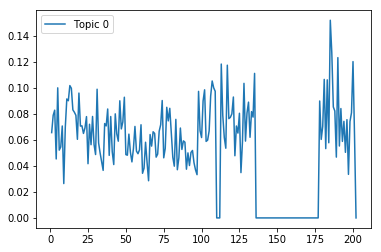

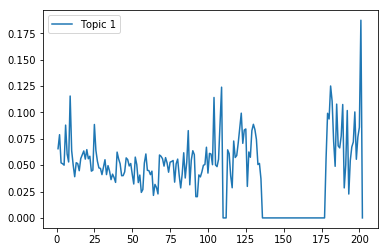

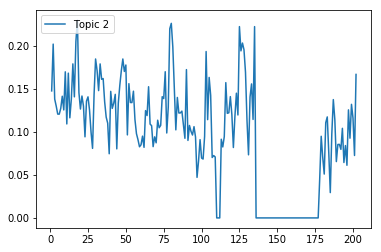

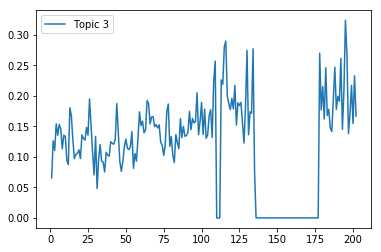

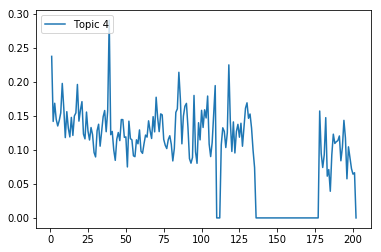

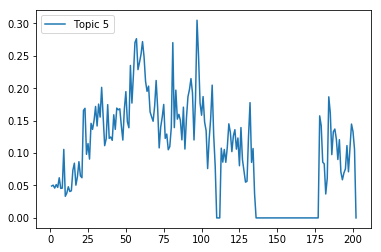

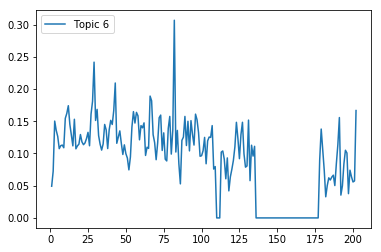

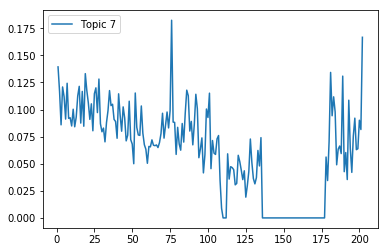

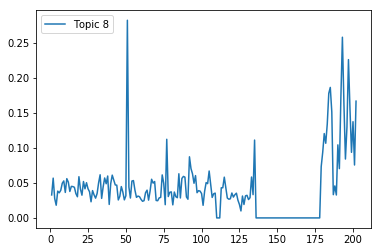

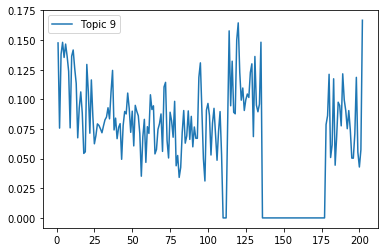

In [373]:
plot_topic_trend_lda(lda_H, lda_W, documents, dates)
#plot_data_all  = plot_topic_trend(lda_H, lda_W, documents, dates)

In [314]:
# write data to csv file for reading into Tableau

outfile = open( 'plot_data_all_lda.11.14.csv', 'w' )
for i in range(len(plot_data_all)):
    for key, value in sorted( plot_data_all[:][i].items() ):
        outfile.write( str(i) + ',' + str(key) + ',' + str(value) + '\n' )
#        outfile.write( str(i) + '\t' + str(key) + '\t' + str(value) + '\n' )
#        print( str(i) + '\t' + str(key) + '\t' + str(value) + '\n' )
outfile.close()

NameError: name 'plot_data_all' is not defined

In [315]:
import pyLDAvis.gensim
import pyLDAvis.sklearn

import gensim
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer)

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.179047  0.108242       1        1  8.226255
11     0.113998  0.127526       2        1  7.645781
3      0.156789 -0.125112       3        1  7.022950
17     0.162023 -0.139900       4        1  6.887546
16     0.015556  0.251640       5        1  6.731845
15     0.117396  0.097114       6        1  5.852794
6      0.076464  0.007144       7        1  5.621511
19     0.089727 -0.126124       8        1  5.303077
2      0.088144 -0.138994       9        1  5.216493
10     0.022024  0.094196      10        1  5.180466
18    -0.006614  0.000958      11        1  4.724394
9     -0.153146 -0.038481      12        1  3.889445
4     -0.090724  0.069141      13        1  3.809843
5     -0.031588 -0.100660      14        1  3.792042
7     -0.111000 -0.009019      15        1  3.777738
14    -0.105997  0.003493      16        1  3.449960
8     -0.107226 -0.016017      17        1  3.372749
13    -0.139950 -0.001406      18        1  3.354987
1     -0.113829 -0.034062      19        1  3.225427
12    -0.161094 -0.029680      20        1  2.914698, topic_info=       Category         Freq               Term        Total  loglift  logprob
term                                                                          
148606  Default  9272.000000              trump  9272.000000  30.0000  30.0000
109928  Default  6688.000000          president  6688.000000  29.0000  29.0000
44166   Default  3233.000000             donald  3233.000000  28.0000  28.0000
44172   Default  3185.000000       donald trump  3185.000000  27.0000  27.0000
28766   Default  3233.000000            clinton  3233.000000  26.0000  26.0000
107088  Default  2822.000000             police  2822.000000  25.0000  25.0000
152402  Default  1903.000000             united  1903.000000  24.0000  24.0000
137768  Default  1881.000000             states  1881.000000  23.0000  23.0000
64763   Default  2202.000000            hillary  2202.000000  22.0000  22.0000
34502   Default  2320.000000              court  2320.000000  21.0000  21.0000
92048   Default  3590.000000                 mr  3590.000000  20.0000  20.0000
97833   Default  2427.000000              obama  2427.000000  19.0000  19.0000
135030  Default  1403.000000              south  1403.000000  18.0000  18.0000
76331   Default  2048.000000             killed  2048.000000  17.0000  17.0000
104386  Default  2719.000000             people  2719.000000  16.0000  16.0000
95253   Default  4955.000000                new  4955.000000  15.0000  15.0000
64764   Default  1771.000000    hillary clinton  1771.000000  14.0000  14.0000
26377   Default  2360.000000              china  2360.000000  13.0000  13.0000
156892  Default  1474.000000                war  1474.000000  12.0000  12.0000
89827   Default  1527.000000           minister  1527.000000  11.0000  11.0000
152485  Default  1329.000000      united states  1329.000000  10.0000  10.0000
71315   Default  1259.000000               iran  1259.000000   9.0000   9.0000
66406   Default  2144.000000              house  2144.000000   8.0000   8.0000
21684   Default  2131.000000           campaign  2131.000000   7.0000   7.0000
38605   Default  1405.000000             debate  1405.000000   6.0000   6.0000
70452   Default  1546.000000      international  1546.000000   5.0000   5.0000
34018   Default  1700.000000            country  1700.000000   4.0000   4.0000
8454    Default  1867.000000           american  1867.000000   3.0000   3.0000
119802  Default  2231.000000         republican  2231.000000   2.0000   2.0000
158890  Default  1279.000000              white  1279.000000   1.0000   1.0000
...         ...          ...                ...          ...      ...      ...
135055  Topic20   333.019324     south carolina   333.865861   3.5329  -4.8806
135631  Topic20   287.466567            special   288.313103   3.5325  -5.0277
135168  Topic20   165.7220

## distances in LDA output

In [14]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity

mat = lda_W

print(0, documents[0])
print(' ')

#dist = cosine_distances(mat[0:1], mat)
#print('cosine distance = ',min(dist[0][1:]))
#min_sim_index = np.argmin(dist[0][1:])
#print(min_sim_index, documents[min_sim_index])
#print(' ')

print('TESTING WITH COSINE SIMILARITY:')
dist = cosine_similarity(mat[0:1], mat)
print('cosine similarity = ',max(dist[0][1:]))
max_sim_index = np.argmax(dist[0][1:])
print(max_sim_index, documents[max_sim_index])
print(' ')
for i in range(len(dist[0])):
    if dist[0][i] >= 0.99:
        print(dist[0][i],i)
        print(documents[i])
        print(' ')

print('TESTING WITH EUCLIDEAN DISTANCE:')
dist = euclidean_distances(mat[0:1], mat)
print('euclidean distance = ',min(dist[0][1:]))
min_sim_index = np.argmin(dist[0][1:])
print(max_sim_index, documents[min_sim_index])
for i in range(len(dist[0])):
    if dist[0][i] <= 0.1:
        print(dist[0][i],i)
        print(documents[i])
        print(' ')


0 For Jeb Bush, a Video in the Shadow of Private Equity Former Florida Gov. Jeb Bush published videos in English and Spanish announcing Right to Rise, his new political action committee, and it looks like he did it on the doorstep of some potential donors....
 
TESTING WITH COSINE SIMILARITY:
cosine similarity =  0.996116010508
1551 If Hillary Clinton&#8217;s Campaign Had Breached Data, She&#8217;d Be Forced Out, Aides Say Mrs. Clinton’s closest advisers say they believe she would have been treated far harsher than Bernie Sanders if it had been her aides who transgressed....
 
1.0 0
For Jeb Bush, a Video in the Shadow of Private Equity Former Florida Gov. Jeb Bush published videos in English and Spanish announcing Right to Rise, his new political action committee, and it looks like he did it on the doorstep of some potential donors....
 
0.996116010508 1552
Obama to Appear on Jerry Seinfeld&#8217;s &#8216;Comedians in Cars Getting Coffee&#8217; In an episode of Mr. Seinfeld’s web serie

## K Means

In [ ]:
#vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
#vz = vectorizer.fit_transform(list(data['tokens'].map(lambda tokens: ' '.join(tokens))))



In [174]:
print(type(lda_W))
lda_W

<class 'numpy.ndarray'>


array([[ 0.00458106,  0.00455254,  0.00457081,  0.98172291,  0.00457268],
       [ 0.00714603,  0.00714461,  0.00719392,  0.97132373,  0.00719171],
       [ 0.00489162,  0.00489308,  0.06363787,  0.92166685,  0.00491058],
       ..., 
       [ 0.00365388,  0.69562579,  0.00364303,  0.29341785,  0.00365945],
       [ 0.00365388,  0.69562579,  0.00364303,  0.29341785,  0.00365945],
       [ 0.00677909,  0.00670252,  0.06598655,  0.7914479 ,  0.12908395]])

trying 1 clusters
trying 2 clusters
trying 3 clusters
trying 4 clusters
trying 5 clusters
trying 6 clusters
trying 7 clusters
trying 8 clusters
trying 9 clusters
trying 10 clusters
trying 11 clusters
trying 12 clusters
trying 13 clusters
trying 14 clusters
trying 15 clusters
trying 16 clusters
trying 17 clusters
trying 18 clusters
trying 19 clusters
trying 20 clusters
trying 21 clusters
trying 22 clusters
trying 23 clusters
trying 24 clusters
trying 25 clusters
trying 26 clusters
trying 27 clusters
trying 28 clusters
trying 29 clusters
trying 30 clusters
trying 31 clusters
trying 32 clusters
trying 33 clusters
trying 34 clusters
trying 35 clusters
trying 36 clusters
trying 37 clusters
trying 38 clusters
trying 39 clusters
trying 40 clusters
trying 41 clusters
trying 42 clusters
trying 43 clusters
trying 44 clusters
trying 45 clusters
trying 46 clusters
trying 47 clusters
trying 48 clusters
trying 49 clusters
trying 50 clusters


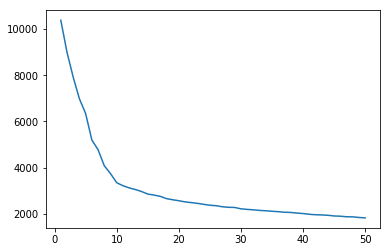

In [374]:
output = {}
for c in range(1,51):
    print(f'trying {c} clusters')
    km = KMeans(n_clusters=c,random_state=10,n_init=1)
    km.fit(lda_W)
    output[c] = km.inertia_

plt.plot(output.keys(),output.values())


In [377]:
c = 15
km = KMeans(n_clusters=c,random_state=10,n_init=1)
km.fit(lda_W)
predict = km.predict(lda_W)

In [ ]:
len(km.cluster_centers_)

In [ ]:
len(predict)

months in dataframe 1 48 47
<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 1 to 705
Data columns (total 3 columns):
topic       705 non-null int64
date        705 non-null int64
num_docs    705 non-null int64
dtypes: int64(3)
memory usage: 42.0 KB
set up dataframe for data None


<Figure size 1224x576 with 0 Axes>

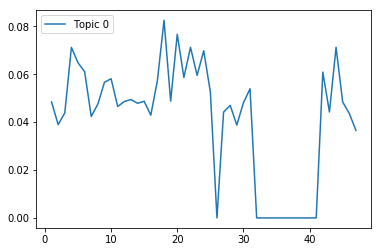

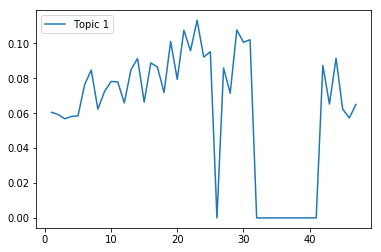

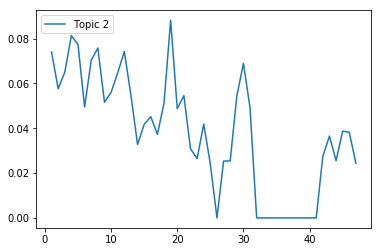

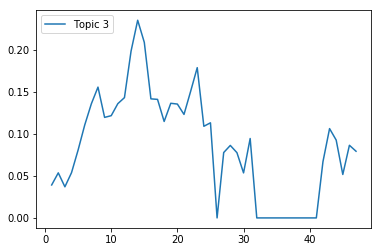

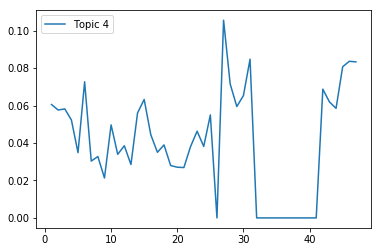

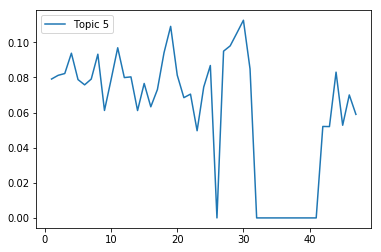

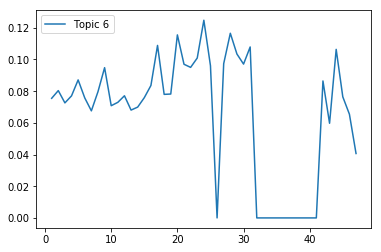

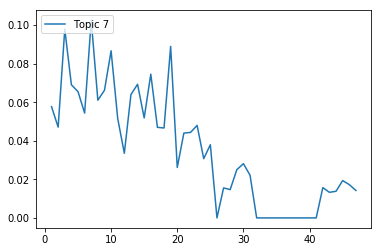

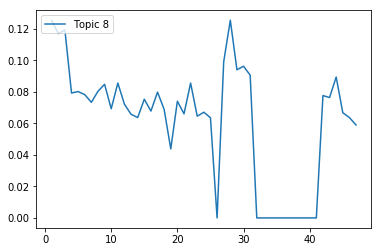

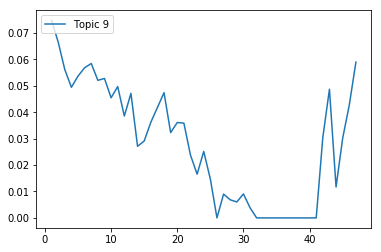

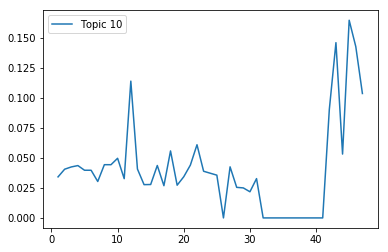

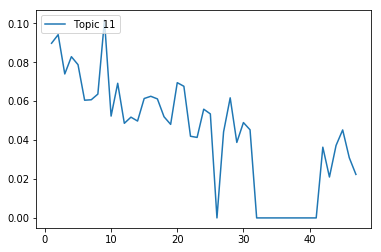

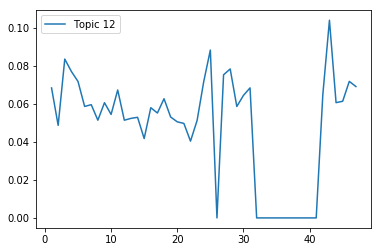

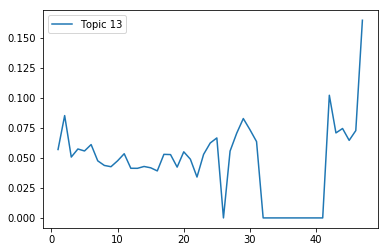

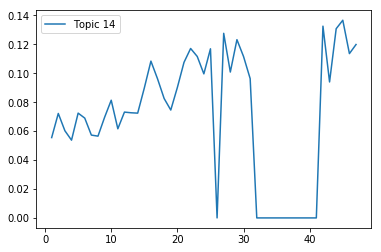

In [378]:
plot_topic_trend_ldaKM(c, predict, dates)


In [188]:
predict[1]

7

In [189]:
df2.groupby('news_desk').count()


,date,headline,snippet,head_snip
news_desk,,,,
Politics,3318,3318,3318,3318
Sports,20044,20044,20044,20044
U.S. / Politics,1078,1078,1078,1078


In [190]:
for p in range(len(predict)):
    if predict[p] == 14:
        print(documents[p])
        print('')


Republican Candidates Assail Hillary Clinton on Voting Rights Three Republican presidential hopefuls struck back at Hillary Rodham Clinton on Friday after she accused them of trying to curtail voting rights....

Today in Politics: Campaign Trail Makes Room for Long Fly Balls and Weekend When seven Republican presidential hopefuls roll into Iowa this weekend for Senator Joni Ernst’s inaugural “Roast and Ride,” only one — Gov. Scott Walker of Wisconsin — will truly be cruising on a motorcycle....

Today in Politics: Mitt Romney Conference Promises Donors and Early Morning Hikes The Supreme Court’s coming decision on health care is not the only court ruling on the law watchers have their eyes on. But most of Thursday’s action and focus will be on Utah, where Republicans will meet Mitt Romney’s list of donors and spe...

Verbatim: The D.N.C.&#8217;s Tongue-in-Cheek Welcome to Donald Trump A statement sent out to reporters from the Democratic National Committee, welcoming Donald Trump to th

## Spherical K Means

In [191]:
# spherical k-means
from spherecluster import SphericalKMeans
K = 15
skm = SphericalKMeans(n_clusters=K)
skm.fit(np.array(lda_W))

# skm.cluster_centers_
# skm.labels_
# skm.inertia_

AttributeError: 'SphericalKMeans' object has no attribute '_check_fit_data'

In [ ]:
from spherecluster import VonMisesFisherMixture
K = 15
vmf_soft = VonMisesFisherMixture(n_clusters=K, posterior_type='soft')
vmf_soft.fit(np.array(lda_W))


In [ ]:
predict = vmf_soft.cluster_centers_

In [ ]:

print(predict)

In [ ]:
plot_topic_trend_ldaKM(15, predict, dates)


## using Word2Vect

In [ ]:
import os

# Setup nltk corpora path and Google Word2Vec location
google_vec_file = '/Users/dana/metis/GoogleNews-vectors-negative300.bin'

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)

In [ ]:
headline = df2['headline'][0:10]
print(headline)

In [ ]:
print(stop_words)

In [ ]:
headline = df2['headline'][0:10]

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

for index, row in headline.iteritems():
    word_tokens = word_tokenize(row)

    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    stemmed_sentence = [ps.stem(w) for w in filtered_sentence]
    print(stemmed_sentence)#model.word_vec('word')

In [ ]:
for index, row in headline.iteritems():
    word_tokens = word_tokenize(row)

    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    #stemmed_sentence = [ps.stem(w) for w in filtered_sentence]
    stemmed_sentence = filtered_sentence
    print(stemmed_sentence)#model.word_vec('word')
    
    headline_vec = []

    for word in stemmed_sentence:
        try:
            vec = model.word_vec(word)
            headline_vec.append(vec)

        except:
            print('*not found*   ', word)

    print(len(headline_vec))
    print('')

In [ ]:
print(len(headline_vec))

### things to try


nltk sentiment intensity analyzer   

try log of probabilities   

Dynamic Topic Model - might be a model in Gensim

Gensim - package for text analysis - Dynamic Topic Models migh be part of this
